# Titanic: ML from Disaster Competition

This is a notebook to perform EDA on the Titanic Dataset and attempt to predict the survivors from the insights we observe.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../input/titanic/train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that the dataset contains 12 columns, 7 numerical and 5 categorical.
The 'Survived','Name','Sex','Age' columns are self-explanatory, as for the rest:

**Pclass** indicates the socioeconomic status of the passenger.
Technically it is a numeric column, however it is actually categorical.

**Ticket** is the ticket number of the passenger

**Fare** is the ticket price

**Cabin** is the cabin number of the passenger

**Embarked** is the port from where the passenger embarked

**SibSp** is the number of siblings or spouses aboard the ship for each passenger and

**Parch** is the number of parents or children aboard the ship

It also looks like a few columns have missing values, something that we'll need to address later.

## EDA

In order to select the features to use for our models, we're going to look at the distribution for each of the variables and its relations to the target variable.

First, we split the dataframe into two, one for the numerical and one for the categorical variables

In [4]:
df_num = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')

In [5]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [6]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


The describe() method can give us a quick glance at some basic descriptive statistics.

In [7]:
df_num.describe().drop('PassengerId', axis  = 1)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next, we will plot the distributions of the variables while paying attention to the relationship with the target variable too, but first we will look at a visualization of the correlations between variables.

[]

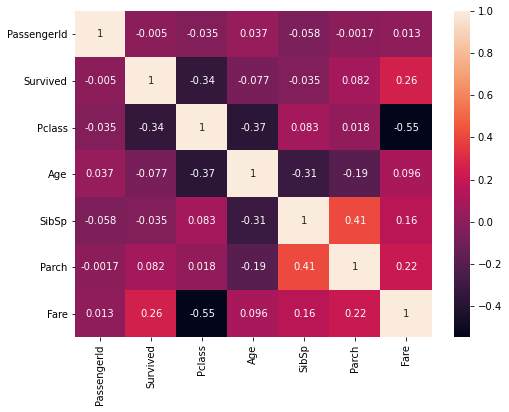

In [8]:
num_corrs = df_num.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(num_corrs, annot = True)
plt.plot()

The variables that seem to affect the survival rate the most are Fare and Pclass, indicating that the financial position of a passenger probably is an important factor for survival.

Somewhat confusingly, Pclass and Fare are highly anticorrelated, but this happens because the smaller values for Pclass indicate higher status.

The rest of the variables look like they have a smaller impact on the probability of survival. SibSp and Parch have a high correlation between them since both are related to the total number of relatives on board. They also both have a significant anticorrelation with the Age variable.

Let's now plot the distributions of the variables.

[]

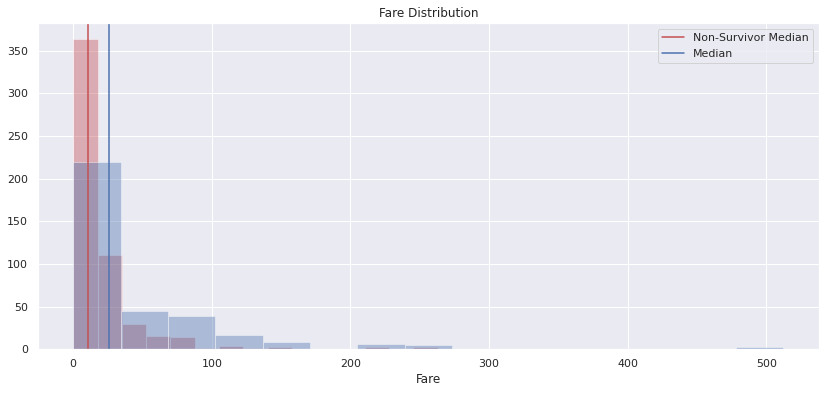

In [9]:
sns.set()
plt.figure(figsize = (14, 6))
a = plt.axvline(df[df['Survived'] == 0]['Fare'].median(), color = 'r')
sns.distplot(df[df['Survived'] == 0]['Fare'], bins = 15, color = 'r', kde = False)
b = plt.axvline(df[df['Survived'] == 1]['Fare'].median(), color = 'b')
plt.legend([a, b], ['Non-Survivor Median', 'Median'])
sns.distplot(df[df['Survived'] == 1]['Fare'], bins = 15, color = 'b', kde = False)
plt.title("Fare Distribution")
plt.plot()

[]

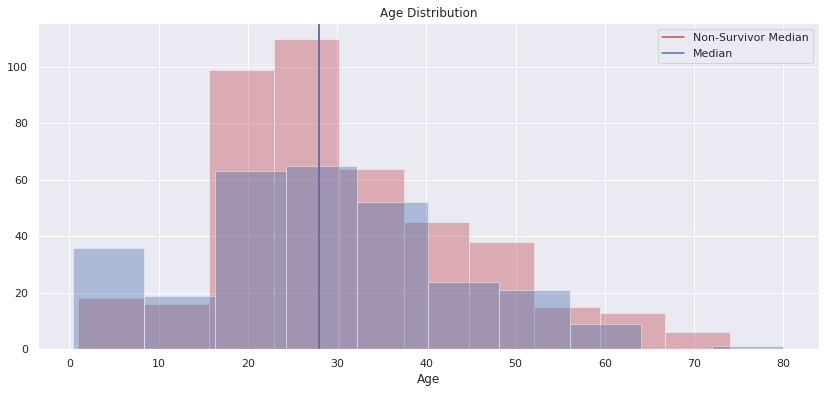

In [10]:
plt.figure(figsize = (14, 6))
a = plt.axvline(df[df['Survived'] == 0]['Age'].median(), color = 'r')
sns.distplot(df[df['Survived'] == 0]['Age'], bins = 10, color = 'r', kde = False)
b = plt.axvline(df[df['Survived'] == 1]['Age'].median(), color = 'b')
plt.legend([a, b], ['Non-Survivor Median', 'Median'])
sns.distplot(df[df['Survived'] == 1]['Age'], bins = 10, color = 'b', kde = False)
plt.title("Age Distribution")
plt.plot()

[]

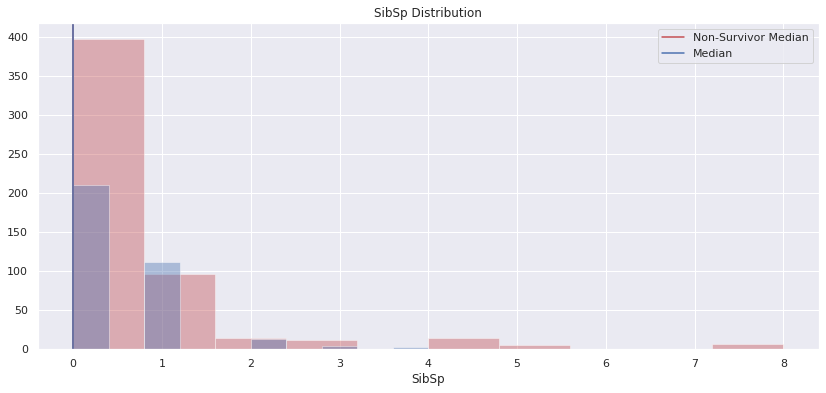

In [11]:
plt.figure(figsize = (14, 6))
a = plt.axvline(df[df['Survived'] == 0]['SibSp'].median(), color = 'r')
sns.distplot(df[df['Survived'] == 0]['SibSp'], bins = 10, color = 'r', kde = False)
b = plt.axvline(df[df['Survived'] == 1]['SibSp'].median(), color = 'b')
plt.legend([a, b], ['Non-Survivor Median', 'Median'])
sns.distplot(df[df['Survived'] == 1]['SibSp'], bins = 10, color = 'b', kde = False)
plt.title("SibSp Distribution")
plt.plot()

[]

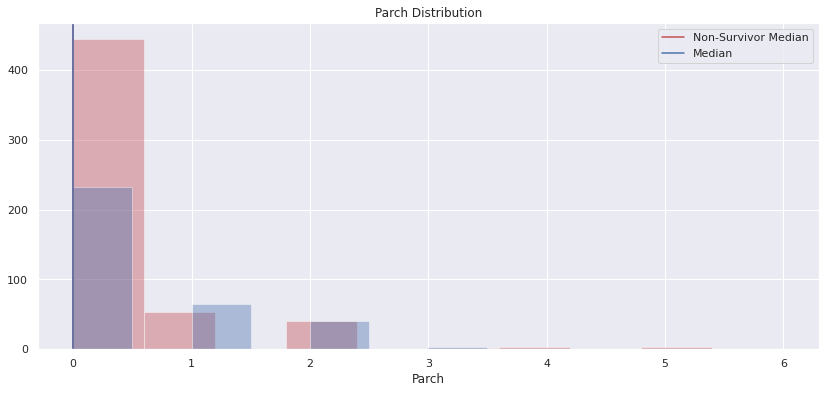

In [12]:
plt.figure(figsize = (14, 6))
a = plt.axvline(df[df['Survived'] == 0]['Parch'].median(), color = 'r')
sns.distplot(df[df['Survived'] == 0]['Parch'], bins = 10, color = 'r', kde = False)
b = plt.axvline(df[df['Survived'] == 1]['Parch'].median(), color = 'b')
plt.legend([a, b], ['Non-Survivor Median', 'Median'])
sns.distplot(df[df['Survived'] == 1]['Parch'], bins = 10, color = 'b', kde = False)
plt.title("Parch Distribution")
plt.plot()

[]

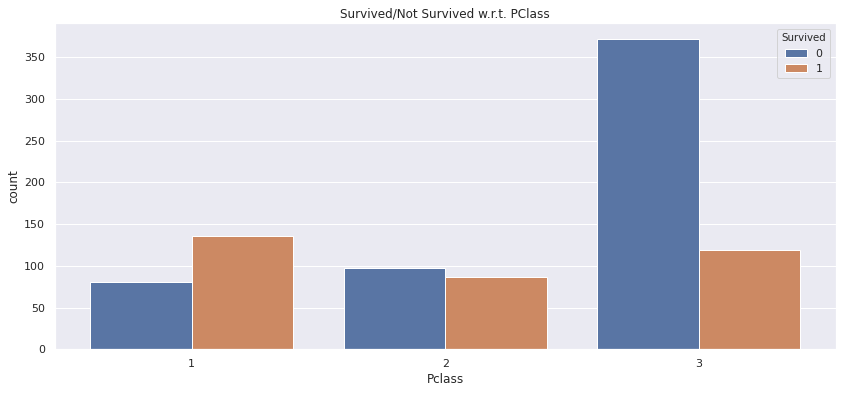

In [13]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df['Pclass'], hue = df['Survived'])
plt.title("Survived/Not Survived w.r.t. PClass")
plt.plot()

[]

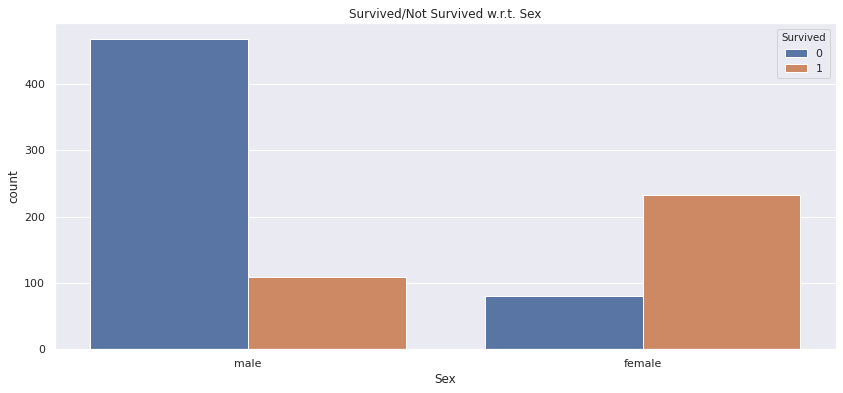

In [14]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df['Sex'], hue = df['Survived'])
plt.title("Survived/Not Survived w.r.t. Sex")
plt.plot()

[]

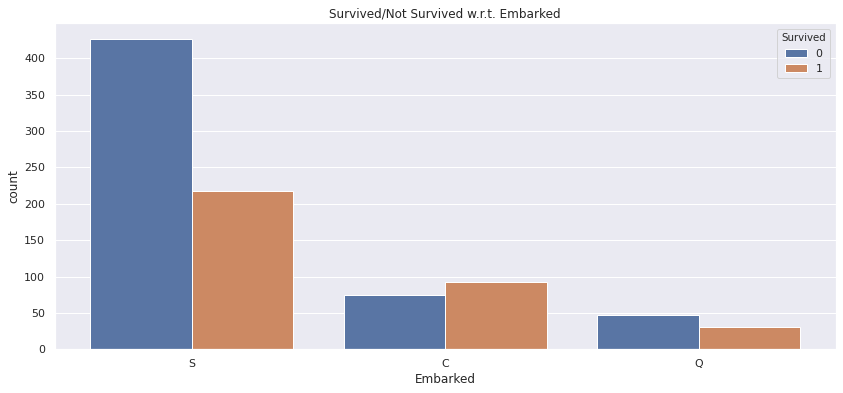

In [15]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df['Embarked'], hue = df['Survived'])
plt.title("Survived/Not Survived w.r.t. Embarked")
plt.plot()

We can see that:

The median ticket price for survivors is higher than fore non-survivors.

The median age is the same for both groups. In fact it looks like age plays a role only for the youngest of passengers (0-10 years old).

The number of siblings and spouses or parents and children, also don't seem to have a big impact on the chances of survival.

On the other hand, Pclass an especially Sex look like they are quite important when it comes to survival.

Finally it looks like the port where the passenger embarked form doesn't have a great impact on survival.

Next up, we'll see if we can extract some more usefull information with feature engineering and also get the data ready for our models to handle.

## Feature engineering & preprocessing

Let's take a look at the categorical variables:

In [16]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


We will focus on the Name and Cabin variables for the moment. 

The Name column contains the first and last name of the passenger, as well as the honorific  they use, such as Mr or Mrs.This can potentially be useful information so we we write a simple function to extract it.

The Cabin column contains information about the cabin where the passenger stayed. It's a letter followed by a number.

In [17]:
df_cat['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
E50            1
D30            1
B71            1
D7             1
E36            1
Name: Cabin, Length: 147, dtype: int64

Apparently a passenger can have multiple cabins under their name, possibly for people who traveled together. We will have to adress this with our code. We will also extract just the letter from the cabin which indicates the deck where the passenger was situated.

In [18]:
import re

def splitter(cols):
    return re.split('\, |\. ', cols)[1]

def remove_digits(col):
    for char in col:
        if not char.isdigit():
            return col[0]
        else:
            return char
        
df_cat['title'] = df_cat['Name'].apply(splitter)
df_cat['deck'] = df_cat['Cabin'].apply(lambda x : str(x).split(' ')[0]).apply(remove_digits)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked,title,deck
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,n
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,n
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,C
4,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,n


In [20]:
print(df_cat['title'].value_counts(), '\n', df_cat['deck'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Ms                1
Don               1
Mme               1
the Countess      1
Lady              1
Jonkheer          1
Capt              1
Name: title, dtype: int64 
 n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: deck, dtype: int64


The 'n' value in the deck column is by far the most common because of the many null values. We will treat this value as seperate category as the missingness may contain information about the survival of the passenger.

As far as the title goes the top four values are quite common honorifics, but there is also a number of unique ones that we will group into a separate value:


In [21]:
df_cat['title'] = df_cat['title'].apply(lambda x : 'Other' if x not in ['Mr', 'Master', 'Miss', 'Mrs'] else x)

print(df_cat['title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: title, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now let's have a look at some plots for the new variables we've created:

[]

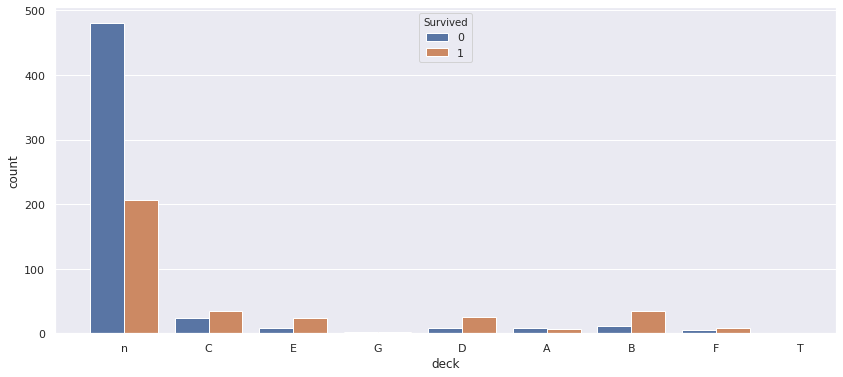

In [22]:
dd = pd.concat([df_cat['deck'], df_num['Survived']], axis = 1)
plt.figure(figsize =  (14, 6))
sns.countplot(x = dd['deck'], hue = dd['Survived'])
plt.plot()

[]

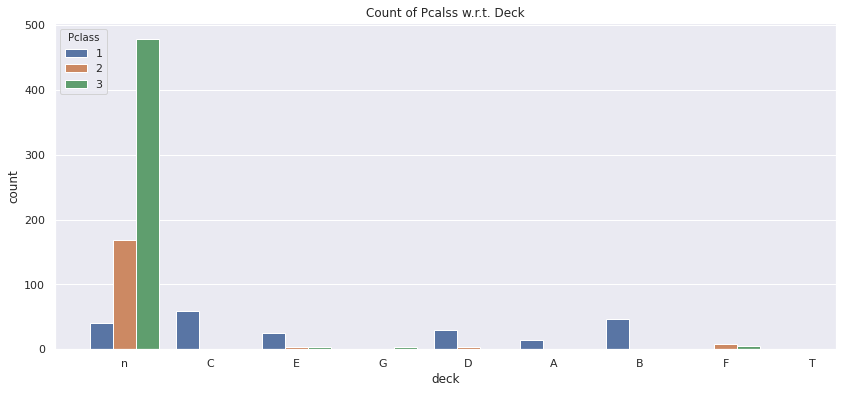

In [23]:
ddd = pd.concat([dd, df_num['Pclass']], axis = 1)
plt.figure(figsize = (14, 6))
sns.countplot(x = ddd['deck'], hue = ddd['Pclass'])
plt.title("Count of Pcalss w.r.t. Deck")
plt.plot()

[]

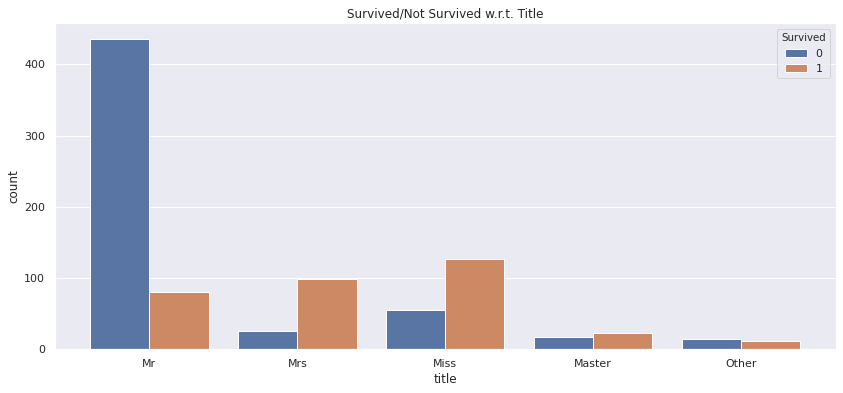

In [24]:
dfd = pd.concat([df_cat['title'], df_num['Survived']], axis = 1)
plt.figure(figsize = (14, 6))
sns.countplot(x = dfd['title'], hue = dfd['Survived'])
plt.title("Survived/Not Survived w.r.t. Title")
plt.plot()

The passengers with female titles are more likely to survive, something to be expected based on the survival rate that we observed earlier. The title 'Master' was given to male children, which also explains the higher survival rate, based on our earlier observations.

As far as the deck is concerned, for most of the values the survival rate is over 50%. Moreover the first decks are mostly populated by 1st class passengers, while the last decks are mostly populated by 3rd class passengers. We're going to group the decks based on the Pclass distribution:

In [25]:
df_cat['deck'] = df_cat['deck'].map({'A':'ABC','B':'ABC','C':'ABC','D':'DE','E':'DE','F':'FG','G':'FG','n':'U','T':'U'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

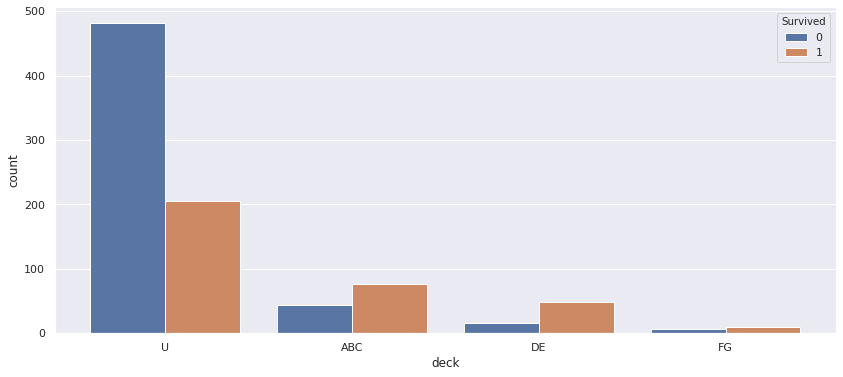

In [26]:
dd = pd.concat([df_cat['deck'],df_num['Survived']],axis=1)
plt.figure(figsize=(14,6))
sns.countplot(x=dd['deck'], hue=dd['Survived'])
plt.plot()

As far as the numeric columns are concerned, we can combine the SibSp and Parch columns in order to make a new feature which indicates whether the passenger is traveling alone or with company.

In [27]:
df_num['alone'] = (df['SibSp'] + df['Parch']).apply(lambda x : 1 if x == 0 else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

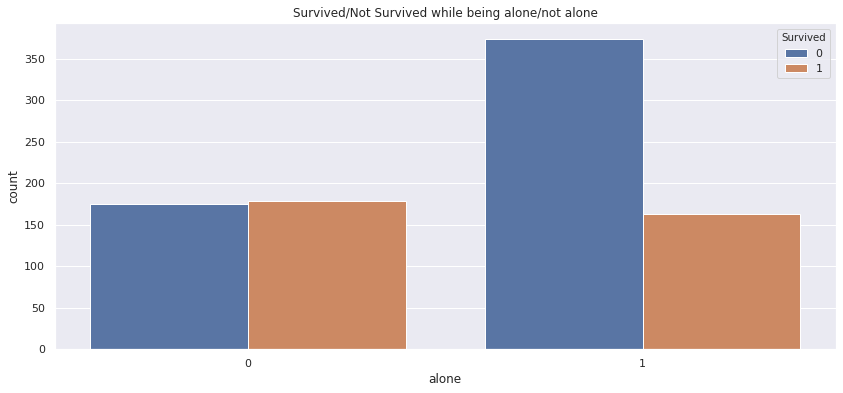

In [28]:
plt.figure(figsize = (14, 6))
sns.countplot(x =  df_num['alone'], hue = df_num['Survived'])
plt.title("Survived/Not Survived while being alone/not alone")
plt.plot()

It appears there is a slighty higher chance of survival for passengers who were traveling with company.

Another transformation we can do is bin the Age and Fare data. We will first bin the Fare data since the Age data contains missing values. We will then impute the Age data and bin them too.

There are a lot of options for the number of bins we can choose, here we will try a 10-bin and 15-bin split:

In [29]:
df_num['fare_bins_10'] = pd.qcut(x = df_num['Fare'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], duplicates = 'drop')
df_num['fare_bins_15'] = pd.qcut(x = df_num['Fare'], q = 15, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], duplicates = 'drop')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

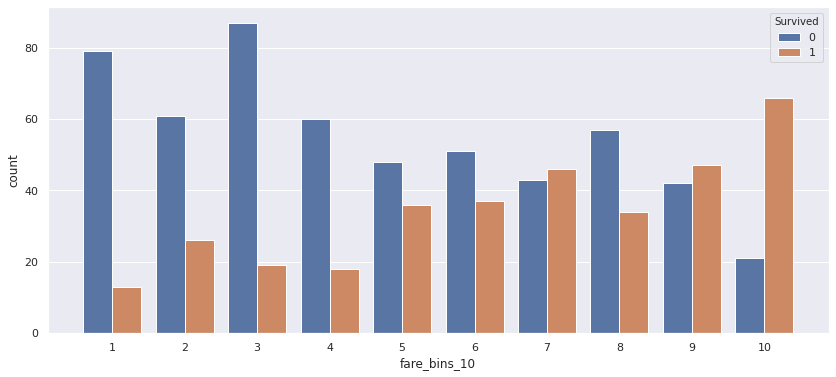

In [30]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df_num['fare_bins_10'], hue = df_num['Survived'])
plt.plot()

[]

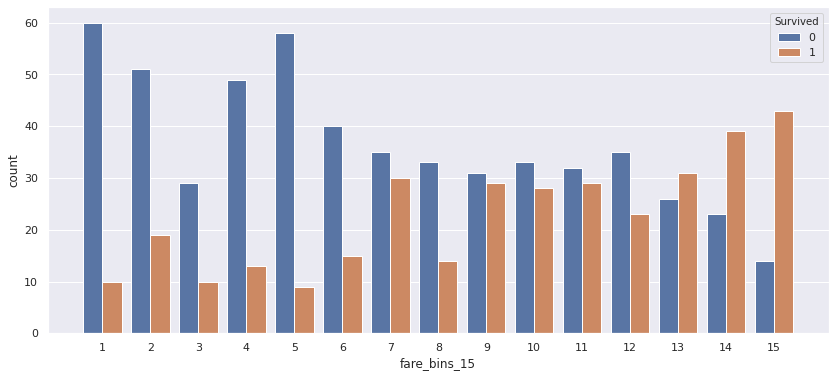

In [31]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df_num['fare_bins_15'], hue = df_num['Survived'])
plt.plot()

We'll pick the 10-bin split.

At this point we can start preparing the data for modeling by filling any missing values and creating dummy variables 

Here, we will fill the missing values using the median age of the passengers based on their title. Since we know that 'Master' corresponds to young male children, perhaps we'll get a more accurate imputation of data this way. Another option would be to impute the median based on Pclass, which is the most highly correlated feature with Age. 

First, let's write a function to impute the data:

In [32]:
df_new = pd.concat([df_num, df_cat], axis = 1)

In [33]:
def imp(cols):
    age = cols[0]
    title = cols[1]
    
    master = df_new[df_new['title'] == 'Master']['Age'].median()
    mr = df_new[df_new['title'] == 'Mr']['Age'].median()
    miss = df_new[df_new['title'] == 'Miss']['Age'].median()
    mrs = df_new[df_new['title'] == 'Mrs']['Age'].median()
    other = df_new[df_new['title'] == 'Other']['Age'].median()
    
    if pd.isnull(age):
        if title == 'Master':
            return master
        elif title == 'Mr':
            return mr
        elif title == 'Mrs':
            return mrs
        elif title == 'Miss':
            return miss
        else:
            return other
    
    else:
        return age

In [34]:
df_new['age_imp'] = df_new[['Age', 'title']].apply(imp, axis = 1)

Now we bin the age data using 10 bins:

In [35]:
df_new['age_bins_15'] = pd.qcut(x = df_new['age_imp'],
                                 q = 10,
                                 labels = [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                 duplicates = 'drop')

[]

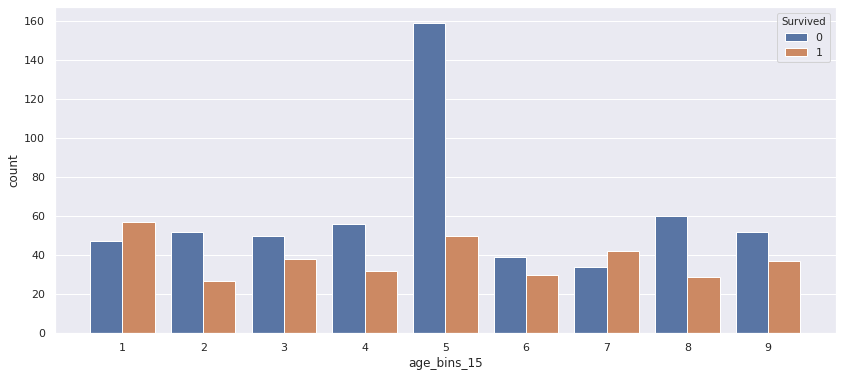

In [36]:
plt.figure(figsize = (14, 6))
sns.countplot(x = df_new['age_bins_15'], hue = df_new['Survived'])
plt.plot()

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Age           714 non-null    float64 
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   alone         891 non-null    int64   
 8   fare_bins_10  891 non-null    category
 9   fare_bins_15  891 non-null    category
 10  Name          891 non-null    object  
 11  Sex           891 non-null    object  
 12  Ticket        891 non-null    object  
 13  Cabin         204 non-null    object  
 14  Embarked      889 non-null    object  
 15  title         891 non-null    object  
 16  deck          891 non-null    object  
 17  age_imp       891 non-null    float64 
 18  age_bins_1

The Embarked column contains 2 null values so we will fill them with the most common value (S).

In [38]:
df_new[df_new['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,alone,fare_bins_10,fare_bins_15,Name,Sex,Ticket,Cabin,Embarked,title,deck,age_imp,age_bins_15
61,62,1,1,38.0,0,0,80.0,1,10,14,"Icard, Miss. Amelie",female,113572,B28,NaN,Miss,ABC,38.0,7
829,830,1,1,62.0,0,0,80.0,1,10,14,"Stone, Mrs. George Nelson (Martha Evelyn)",female,113572,B28,NaN,Mrs,ABC,62.0,9


In [39]:
df_new.loc[81,'Embarked'] = 'S'
df_new.loc[829,'Embarked'] = 'S'

Finally, we'll create dummy variables for Sex, title, deck and Embarked and create a new dataframe containing our final set of features:

In [40]:
dummies = pd.get_dummies(df_new[['Embarked',  'Sex', 'title', 'deck']], drop_first = True)

In [41]:
df_final = pd.concat([df_new, dummies], axis = 1).drop(
    ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'fare_bins_15', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'title', 'age_imp', 'deck'], axis = 1)

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   alone         891 non-null    int64   
 3   fare_bins_10  891 non-null    category
 4   age_bins_15   891 non-null    category
 5   Embarked_Q    891 non-null    uint8   
 6   Embarked_S    891 non-null    uint8   
 7   Sex_male      891 non-null    uint8   
 8   title_Miss    891 non-null    uint8   
 9   title_Mr      891 non-null    uint8   
 10  title_Mrs     891 non-null    uint8   
 11  title_Other   891 non-null    uint8   
 12  deck_DE       891 non-null    uint8   
 13  deck_FG       891 non-null    uint8   
 14  deck_U        891 non-null    uint8   
dtypes: category(2), int64(3), uint8(10)
memory usage: 32.2 KB


## Models

Now comes the time to train our classifiers. We'll use 10-fold cross-validation.

We'll use 4 classifiers and aggregate their predictions with a voting classifier.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
x = df_final.drop('Survived', axis = 1)
y = df_final['Survived']

In [45]:
lr = LogisticRegression(solver = 'liblinear', max_iter = 200)
knn = KNeighborsClassifier(n_neighbors = 10)
forest = RandomForestClassifier(n_estimators = 200)
svc = SVC()

In [46]:
models = [lr, knn, forest, svc]

scores = []
for model in models:
    scores.append(cross_val_score(model, x, y, cv = 10))

for score in scores:
    print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.80 (+/- 0.06)
Accuracy: 0.79 (+/- 0.09)
Accuracy: 0.81 (+/- 0.07)
Accuracy: 0.80 (+/- 0.07)


Not bad! Let's see how the voting classifier does:

In [47]:
vote = VotingClassifier(estimators = [('knn', knn), ('forest', forest), ('svc', svc), ('lr', lr)])

In [48]:
score = cross_val_score(vote, x, y, cv = 10)

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.83 (+/- 0.07)


The voting classifier does better than each of the other classifiers. This is the power of ensemble methods!

Now we will use the voting classifier on the test data and submit our predictions:

In [50]:
test_df = pd.read_csv('../input/titanic/test.csv')

First, we apply all the transformations we did for our training set:

In [51]:
p_id = test_df['PassengerId']

test_df = test_df.drop('PassengerId', axis = 1)

In [52]:
test_df['title'] = test_df['Name'].apply(splitter)
test_df['deck'] = test_df['Cabin'].apply(lambda x : str(x).split(' ')[0]).apply(remove_digits)
test_df['title'] = test_df['title'].apply(lambda x : 'Other' if x not in ['Mr', 'Master', 'Miss', 'Mrs'] else x)
test_df['alone'] = (test_df['SibSp'] + test_df['Parch']).apply(lambda x : 1 if x == 0 else 0)
test_df['age_imp'] = test_df[['Age', 'title']].apply(imp, axis = 1)
test_df['fare_bins'] = pd.qcut(x = test_df['Fare'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], duplicates = 'drop')
test_df['age_bins'] = pd.qcut(x = test_df['age_imp'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9], duplicates = 'drop')

In [53]:
test_df['deck'] = test_df['deck'].map({'A':'ABC','B':'ABC','C':'ABC','D':'DE','E':'DE','F':'FG','G':'FG','n':'U'})

In [54]:
test_dummies = pd.get_dummies(test_df[['Embarked', 'Sex', 'title', 'deck']], drop_first = True)

test_df_final = pd.concat([test_df, test_dummies], axis = 1).drop(
    ['Age', 'SibSp', 'Parch', 'Fare', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'title', 'age_imp', 'deck'], axis = 1)

In [55]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    int64   
 1   alone        418 non-null    int64   
 2   fare_bins    417 non-null    category
 3   age_bins     418 non-null    category
 4   Embarked_Q   418 non-null    uint8   
 5   Embarked_S   418 non-null    uint8   
 6   Sex_male     418 non-null    uint8   
 7   title_Miss   418 non-null    uint8   
 8   title_Mr     418 non-null    uint8   
 9   title_Mrs    418 non-null    uint8   
 10  title_Other  418 non-null    uint8   
 11  deck_DE      418 non-null    uint8   
 12  deck_FG      418 non-null    uint8   
 13  deck_U       418 non-null    uint8   
dtypes: category(2), int64(2), uint8(10)
memory usage: 12.3 KB


The fare_bins column still has a null value:

In [56]:
test_df_final[test_df_final['fare_bins'].isnull()]

,Pclass,alone,fare_bins,age_bins,Embarked_Q,Embarked_S,Sex_male,title_Miss,title_Mr,title_Mrs,title_Other,deck_DE,deck_FG,deck_U
152,3,1,NaN,9,0,1,1,0,1,0,0,0,0,1


We'll fill it with the most common value from the training set:

In [57]:
test_df_final.loc[152,'fare_bins'] = x['fare_bins_10'].mode()[0]

Finally we train our voting classifier and use it to make predictions on the test set:

In [58]:
vote.fit(x,y)

preds = vote.predict(test_df_final)

Now let's make a CSV file to submit:

In [59]:
submission = pd.DataFrame({'PassengerId' : p_id, 'Survived' : preds})


submission.to_csv('submission.csv', index = False)